## Introduction

This is an exercise in coding mathematical modelling in epidemiology.  Functions written Thu 16 October to Mon 20 October.

We obtain compartmental models from stochastic Petri nets, encoded as multi directed graphs using the Python package NetworkX.  We then construct sets of differential equations from the graphs, and perform simulations using SciPy methods to solve initial value problems.

Note that this Jupyter notebook only shows how to use the functions, not how they work.

If you want to see the code behind this, you need to look in the imported Python files.

## SIR model

In [1]:
from model_graphs import G_SIR

G_SIR

This has nodes which are _species_ or _transactions_, and edges between them.

The graph also contains extra data specifying positions of nodes and curvatures of edges.  This allows us to draw nice pictures using a bespoke function.

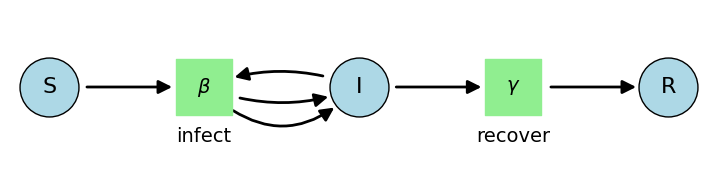

In [2]:
from SPN_functions import draw_SPN

draw_SPN(G_SIR, t_disp='latex')

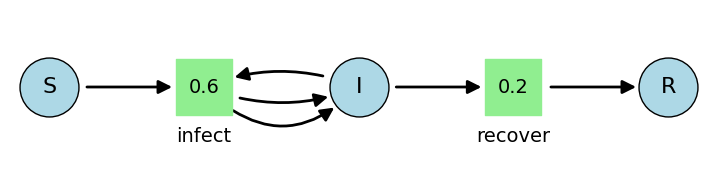

In [3]:
# display specified rates instead of symbols
draw_SPN(G_SIR)

We can obtain differential equations from the graph.  As a check, we can view the equations, formatted using LaTeX.

In [4]:
from SPN_functions import jupyter_rate_eqs

jupyter_rate_eqs(G_SIR)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
jupyter_rate_eqs(G_SIR, symbol=False)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can also generate a function which implements these differential equations from the graph.

It has two inputs: time (not used in these equations) and a tuple of initial conditions.

Note that $S, I, R$ represent proportions of our population, so we should have $S+I+R=1$.

We test an example where $S=I=0.5$ and $R=0$, so we expect the derivatives to be $(-0.15, 0.05, 0.1)$.

In [6]:
from SPN_functions import python_rate_fun

SIR_rates = python_rate_fun(G_SIR)

test_init_values = (0.5, 0.5, 0)

SIR_rates(0, test_init_values)

(-0.15, 0.04999999999999999, 0.1)

Given how Python works with floats, this is what we expected.

Now we can perform simulations.  Our solve function uses the differential equation function shown above, and calls the SciPy method solve_ivp for initial value problems.  By default, it runs over a timespan from 0 to 365 (1 year inclusive of endpoints).

First we set up some initial conditions, assuming a total population of 69 million and no-one is resistant at the start.

In [7]:
total_pop = 69e6

def SIR_from_NI(n):
    I0 = n/total_pop
    return (1 - I0, I0, 0)
    
ns = [1, 1000, 100000, 10000000]

for n in ns:
    print(SIR_from_NI(n))




(0.9999999855072463, 1.4492753623188406e-08, 0)
(0.9999855072463768, 1.4492753623188405e-05, 0)
(0.9985507246376811, 0.0014492753623188406, 0)
(0.855072463768116, 0.14492753623188406, 0)


In [8]:
from SPN_functions import solve_SPN

SIR_sims = {}
for n in ns:
    SIR_sims[n] = solve_SPN(G_SIR, SIR_from_NI(n))
SIR_sims[1]

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  7.680e-02 ...  3.647e+02  3.650e+02]
        y: [[ 1.000e+00  1.000e+00 ...  5.952e-02  5.952e-02]
            [ 1.449e-08  1.494e-08 ...  1.163e-12  1.104e-12]
            [ 0.000e+00  2.261e-10 ...  9.405e-01  9.405e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2036
     njev: 0
      nlu: 0

Let's plot the number of infected people against time.

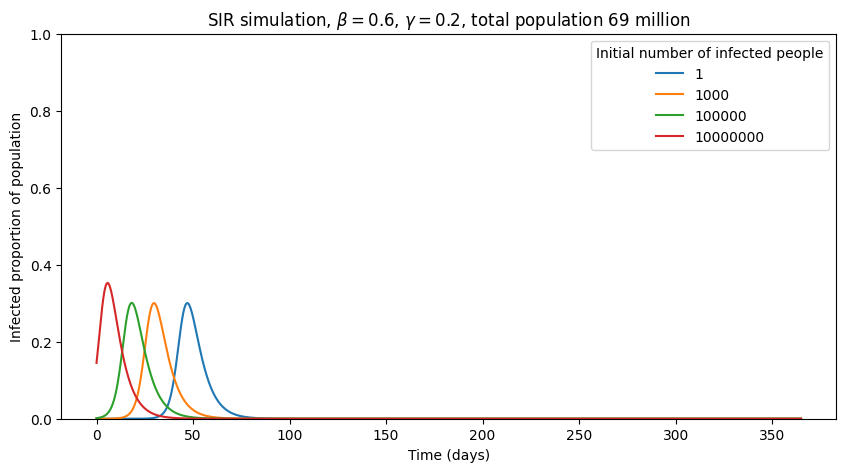

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5)) # default (width, height) = (6.4, 4.8)

for n in ns:
    plt.plot(SIR_sims[n].t, SIR_sims[n].y[1], label=f"{n}")

plt.xlabel('Time (days)')
plt.ylabel('Infected proportion of population')
plt.legend(title="Initial number of infected people")
plt.title("SIR simulation, " + r"$\beta=0.6$, $\gamma=0.2$, total population 69 million")
plt.ylim(0,1)
plt.show()



It seems that in this simple model with constant rates, if the initial (nonzero) number of infected people is low, this just causes a time delay in the disease spread.  Even a huge initial infected population (10 million people) doesn't drastically affect the qualitative picture.

We can display the SIR proportions via another graph.  As initial conditions we assume $I=0.00000003$, meaning that around 2 people in a population of 69 million would be infected, and $R=0$.

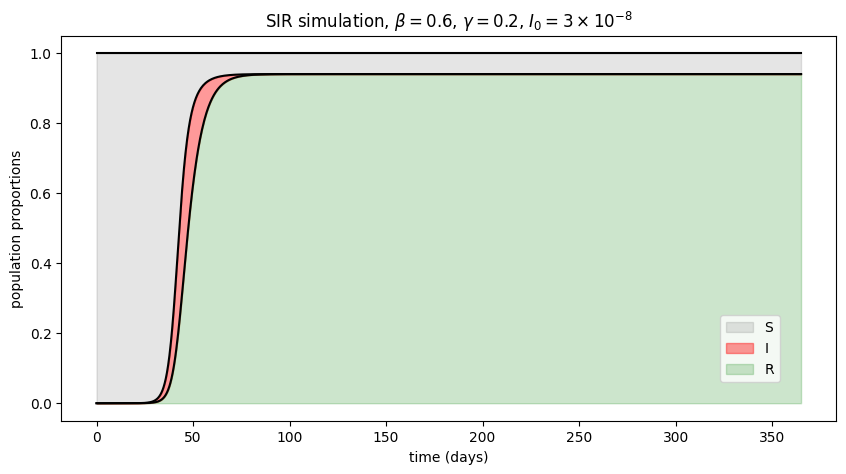

In [10]:
# set initial conditions
SIR0 = (1-3e-8, 3e-8, 0)

# colours for graph
SIR_colors = {'S': 'black',
              'I': 'red',
              'R': 'green'
             }

# shading for fills in graph
SIR_alphas = {'S': 0.1,
              'I': 0.4,
              'R': 0.2
             }


from SPN_functions import proportions

proportions(G_SIR, SIR0, col_alpha=True, cols=SIR_colors, alphas=SIR_alphas, key_loc=(0.85,0.1),
            title="SIR simulation, " + r"$\beta=0.6$, $\gamma=0.2$, $I_0=3\times 10^{-8}$")




## SIRDS model


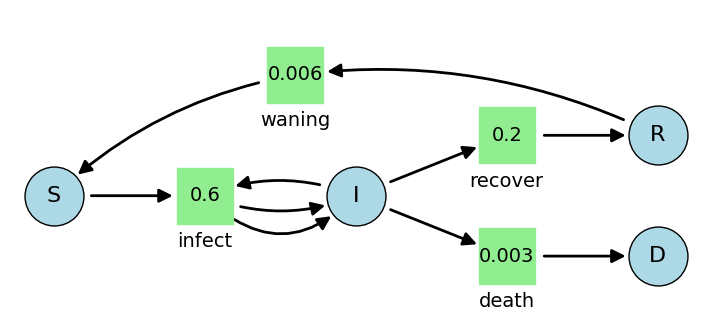

In [11]:
from model_graphs import G_SIRDS
draw_SPN(G_SIRDS)

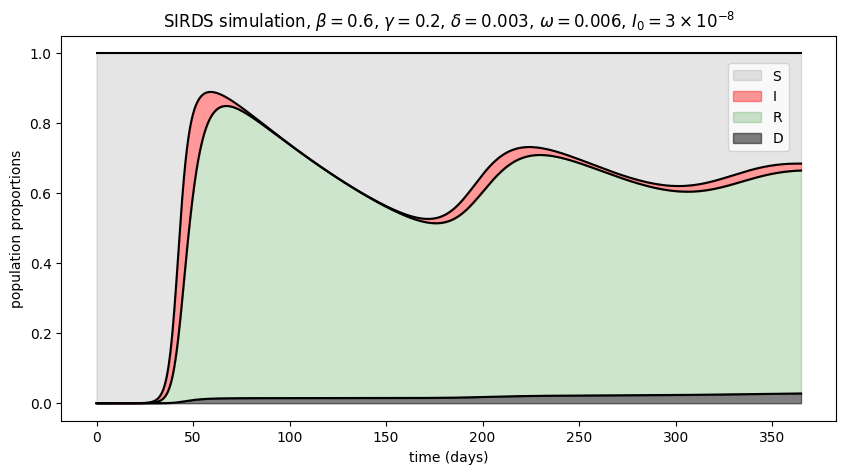

In [12]:
# set initial conditions
SIRDS0 = (1-3e-8, 3e-8, 0, 0)

# colours for graph
SIRDS_colors = {'S': 'black',
                'I': 'red',
                'R': 'green',
                'D': 'black'
               }

# shading for fills in graph
SIRDS_alphas = {'S': 0.1,
                'I': 0.4,
                'R': 0.2,
                'D': 0.5
               }

# graw the graph
proportions(G_SIRDS, SIRDS0, col_alpha=True, cols=SIRDS_colors, alphas=SIRDS_alphas, key_loc=(0.86,0.7),
            title="SIRDS simulation, " + r"$\beta=0.6$, $\gamma=0.2$, $\delta=0.003$, $\omega=0.006$, $I_0=3\times 10^{-8}$")



## Double SIRDS model

Now we use a model which has separate SIRDS quantities for young and old

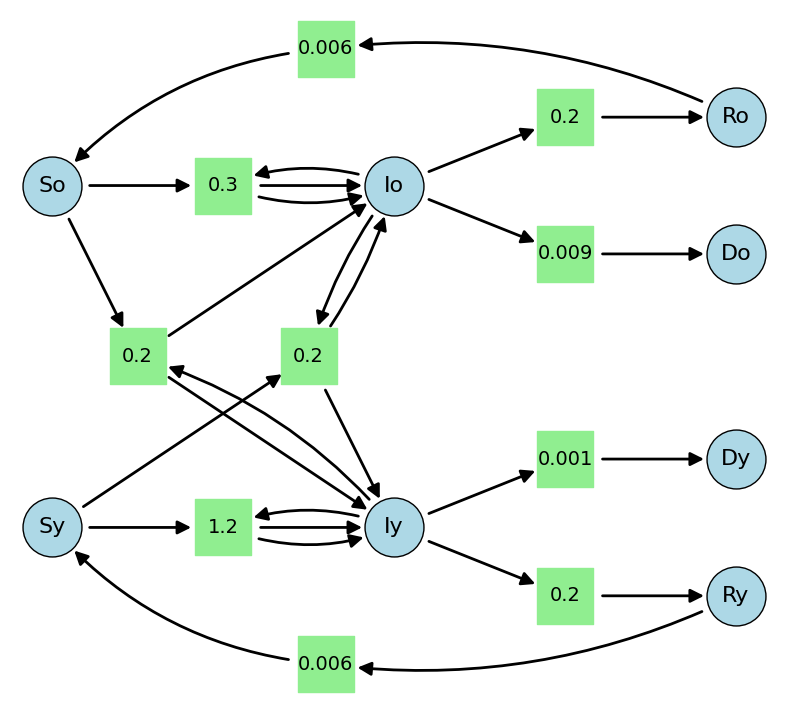

In [18]:
from model_graphs import G_SIRDS2
draw_SPN(G_SIRDS2, t_label=False)

In [14]:
jupyter_rate_eqs(G_SIRDS2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

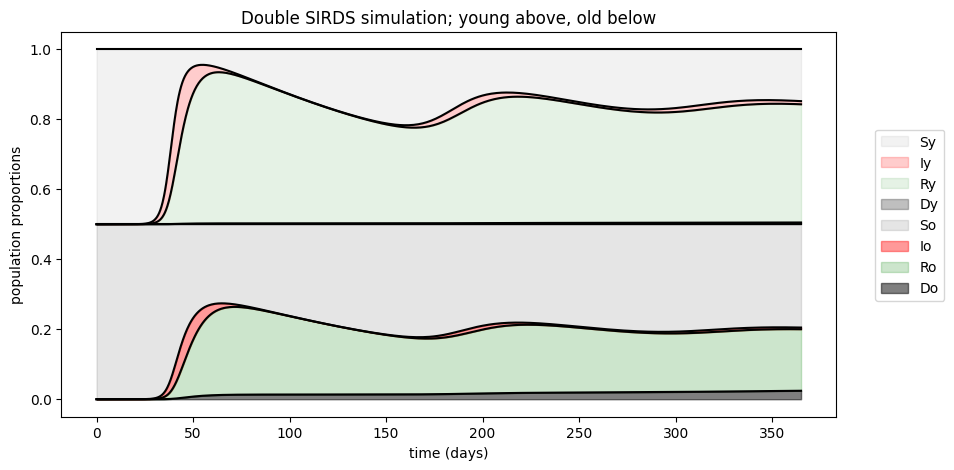

In [15]:
# set initial conditions
# ['Sy', 'Iy', 'Ry', 'Dy', 'So', 'Io', 'Ro', 'Do']
SIRDS20 = ((1-3e-8)/2, 3e-8, 0, 0, (1-3e-8)/2, 0, 0, 0)

# colours for graph
SIRDS2_colors = {'Sy': 'black',
                 'Iy': 'red',
                 'Ry': 'green',
                 'Dy': 'black',
                 'So': 'black',
                 'Io': 'red',
                 'Ro': 'green',
                 'Do': 'black',
                }

# shading for fills in graph
SIRDS2_alphas = {'Sy': 0.05,
                 'Iy': 0.2,
                 'Ry': 0.1,
                 'Dy': 0.25,
                 'So': 0.1,
                 'Io': 0.4,
                 'Ro': 0.2,
                 'Do': 0.5
                }

# graw the graph
proportions(G_SIRDS2, SIRDS20, col_alpha=True, cols=SIRDS2_colors, alphas=SIRDS2_alphas, key_loc=(1.05,0.3),
            title="Double SIRDS simulation; young above, old below")



## Constructing a model

What if we wanted to use a model that's not set up, like an SEIR model where there is an exposed period before someone is infectious?

We can do this easily, then use the above functions.

In [16]:
import networkx as nx

G_SEIR = nx.MultiDiGraph()

G_SEIR.add_nodes_from(['S', 'E', 'I', 'R'], type='species')

G_SEIR.add_node('expose', rate=0.6, type='transaction')
G_SEIR.add_node('develop', rate=0.5, type='transaction')
G_SEIR.add_node('recover', rate=0.2, type='transaction')

G_SEIR.add_edges_from([('S', 'expose'),
                       ('I', 'expose'),
                       ('expose', 'I'),
                       ('expose', 'E'),
                       ('E', 'develop'),
                       ('develop', 'I'),
                       ('I', 'recover'),
                       ('recover','R')
                      ])


[0, 0, 0, 0, 0, 0, 0, 0]

We can run simutions immediately.

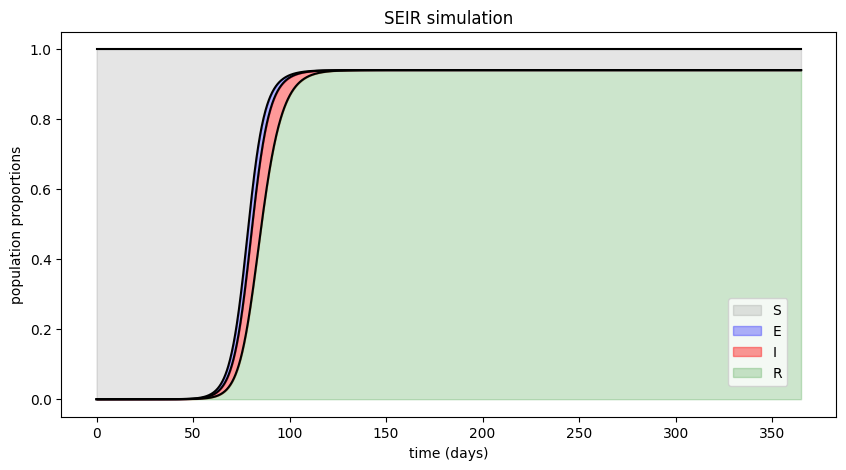

In [33]:
# set initial conditions
SEIR0 = (1-3e-8, 3e-8, 0, 0)

# colours for graph
SEIR_colors = {'S': 'black',
               'E': 'blue',
               'I': 'red',
               'R': 'green'
               }

# shading for fills in graph
SEIR_alphas = {'S': 0.1,
                'E': 0.3,
                'I': 0.4,
                'R': 0.2
               }

# graw the graph
proportions(G_SEIR, SEIR0, col_alpha=True, cols=SEIR_colors, alphas=SEIR_alphas, key_loc=(0.86,0.08),
            title="SEIR simulation")



If we want to draw a nice picture of the graph, we just have to specify a few parameters.

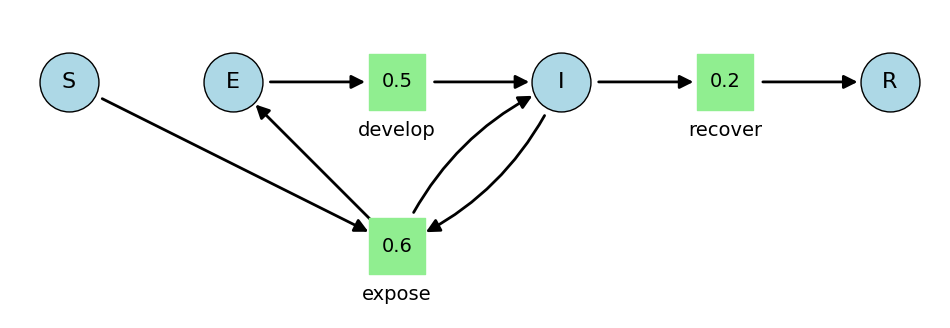

In [36]:
G_SEIR.graph['pos'] = {
    'S': (0.5, 0),
    'E': (1, 0),
    'I': (2, 0),
    'R': (3, 0),
    'develop': (1.5, 0),
    'recover': (2.5, 0),
    'expose': (1.5, -0.5)
}

G_SEIR.graph['edge_curvatures'] = {
    ('I', 'expose', 0): -0.2,
    ('expose', 'I', 0): -0.2
}

G_SEIR.graph['label_offset'] = 0.12
G_SEIR.graph['figsize'] = (12,4)


draw_SPN(G_SEIR)